<a href="https://colab.research.google.com/github/sheetal051/miniproject3/blob/main/miniproject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
###**Part II: Data Analytics**


---
###**Q12. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform**
###**the following operations:**
---

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [10]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))


---
###**(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number**
###**rows having missing values.**
---


In [11]:
# Step 1: Create random dataset with values between 1 and 200
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))

# Step 2: Replace values between 10 and 60 (inclusive) with NaN
df_na = df.mask(df.applymap(lambda x: 10 <= x <= 60))

# Step 3: Count number of rows with missing values
rows_with_na = df_na.isnull().any(axis=1).sum()
print(f"(i) Number of rows with missing values: {rows_with_na}")


(i) Number of rows with missing values: 100


/tmp/ipython-input-11-1426688406.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_na = df.mask(df.applymap(lambda x: 10 <= x <= 60))


---
###**(ii) Replace all the NA values with the average of the column value.**
---

In [12]:
df_filled = df_na.fillna(df_na.mean())
print("(ii) Replaced all NA values with column-wise means.")


(ii) Replaced all NA values with column-wise means.


---
###**(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns**
###**having correlation <=0.7**
---

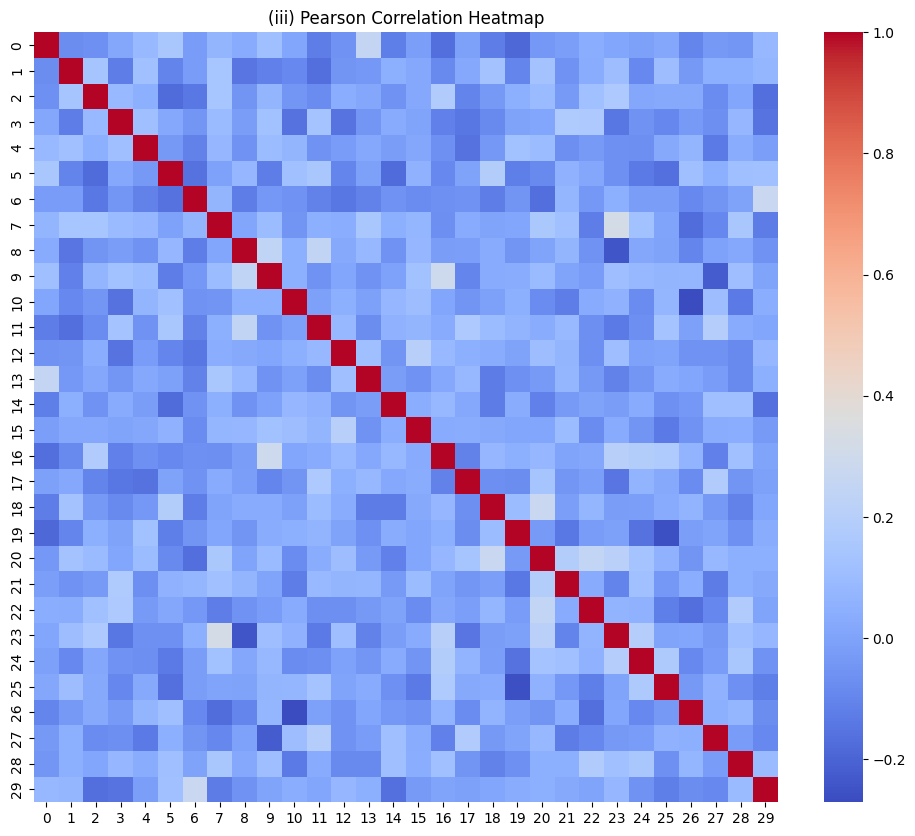

Selected columns with correlation ≤ 0.7: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [13]:
# Step 1: Compute correlation matrix
corr_matrix = df_filled.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('(iii) Pearson Correlation Heatmap')
plt.show()

# Step 3: Select columns where correlation with any other column is ≤ 0.7
# We'll retain columns not strongly correlated with others (> 0.7)
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            to_drop.add(corr_matrix.columns[j])

df_low_corr = df_filled.drop(columns=to_drop)
print(f"Selected columns with correlation ≤ 0.7: {df_low_corr.columns.tolist()}")


---
###**(iv) Normalize all the values in the dataset between 0 and 10.**
---

In [14]:
df_normalized = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10
print("Normalized all values between 0 and 10.")


Normalized all values between 0 and 10.


---
###**(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.**
---

In [15]:
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)
print("Replaced all values: 1 if ≤ 0.5, else 0.")


Replaced all values: 1 if ≤ 0.5, else 0.


/tmp/ipython-input-15-115055105.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


---
###**Q13. Create a random dataset of 500 rows and 10 columns.**
###**Columns 1 to 4 are defined between [-10, 10];**
###**Columns 5 to 8 are defined between [10, 20];**
###**Columns 9 to 10 are defined between [-100, 100].**
###**Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric**
###**graph using each algorithm**
---

In [16]:
import numpy as np


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [4]:
np.random.seed(42)
part1 = np.random.uniform(-10, 10, size=(500, 4))
part2 = np.random.uniform(10, 20, size=(500, 4))
part3 = np.random.uniform(-100, 100, size=(500, 2))

data = np.hstack((part1, part2, part3))
df = pd.DataFrame(data, columns=[f"col{i+1}" for i in range(10)])


In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


---
###**(i) K-Mean clustering**
---


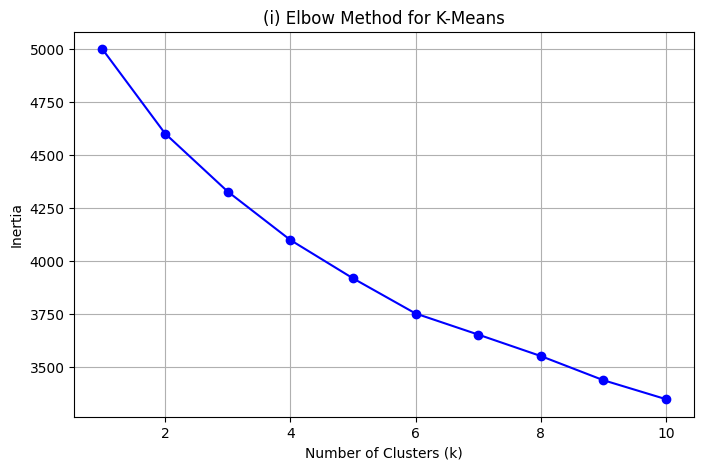

In [7]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('(i) Elbow Method for K-Means')
plt.grid(True)
plt.show()


---
###**(ii) Hierarchical clustering**
---

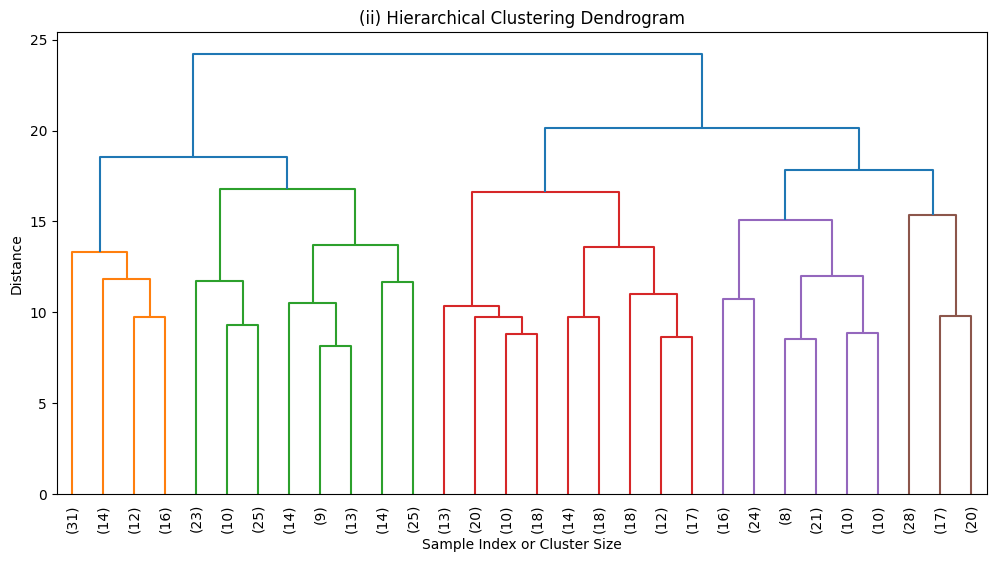

In [8]:
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('(ii) Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()


---
###**Q14. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100].**
###**Perform the following operations:**
---

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
np.random.seed(42)  # reproducibility
df = pd.DataFrame(
    np.random.uniform(-100, 100, size=(600, 15)),
    columns=[f"col{i+1}" for i in range(15)]
)


---
###**(i) Plot scatter graph between Column 5 and Column 6.**
---

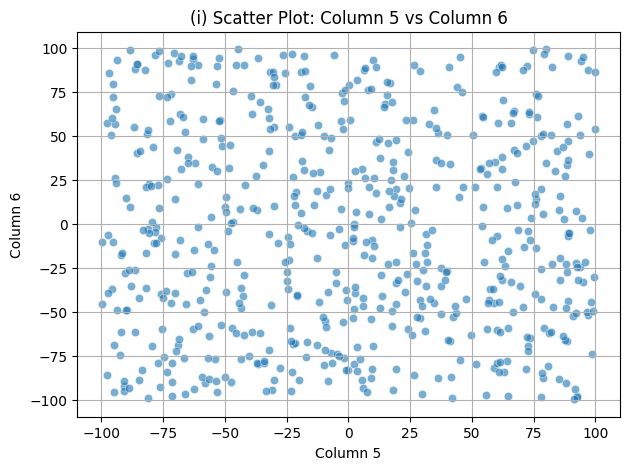

In [19]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="col5", y="col6", alpha=0.6)
plt.title("(i) Scatter Plot: Column 5 vs Column 6")
plt.xlabel("Column 5")
plt.ylabel("Column 6")
plt.grid(True)
plt.show()


---
###**(ii) Plot histogram of each column in single graph.**
---

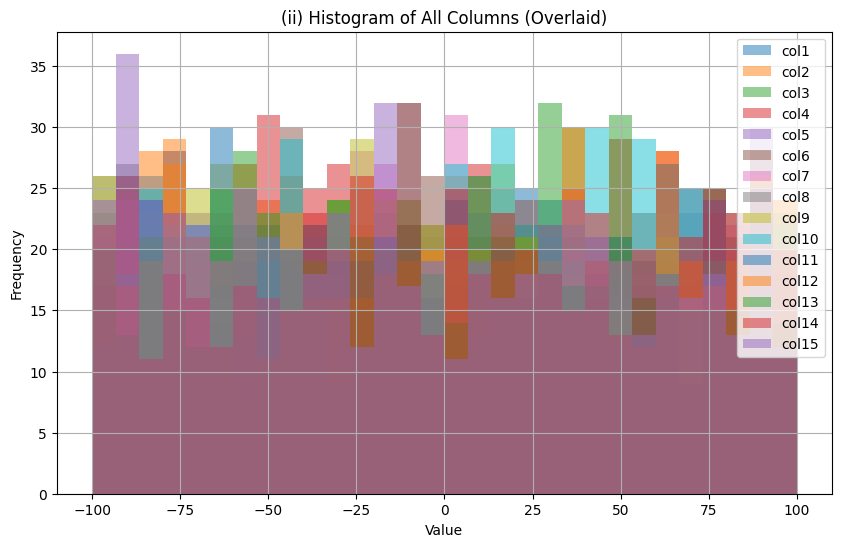

In [20]:
df.plot(kind='hist', bins=30, figsize=(10, 6), alpha=0.5)
plt.title("(ii) Histogram of All Columns (Overlaid)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


---
###**(iii) Plot the Box plot of each column in single graph.**
---

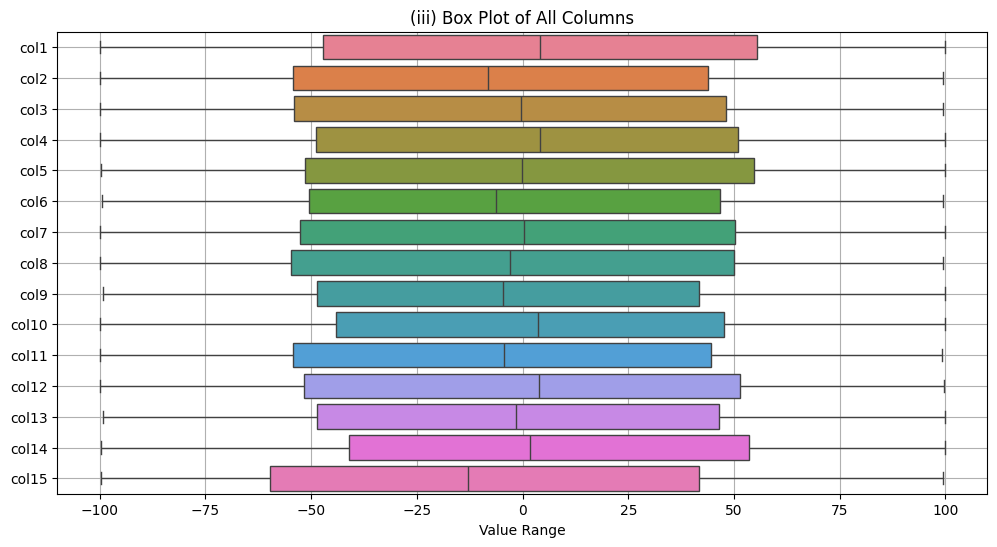

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title("(iii) Box Plot of All Columns")
plt.xlabel("Value Range")
plt.grid(True)
plt.show()


---
###**Q15. Create a random dataset of 500 rows and 5 columns:**
###**All the values are defined between [5,10].**
###**Perform the following operations:**
---

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums


In [23]:
np.random.seed(42)
df = pd.DataFrame(
    np.random.uniform(5, 10, size=(500, 5)),
    columns=[f"col{i+1}" for i in range(5)]
)


---
###**(i) Perform t-Test on each column.**
---

In [24]:
print("(i) One-Sample t-Test (H0: mean = 7.5):")
for col in df.columns:
    t_stat, p_val = ttest_1samp(df[col], 7.5)
    print(f"{col}: t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")


(i) One-Sample t-Test (H0: mean = 7.5):
col1: t-stat = 0.5041, p-value = 0.6144
col2: t-stat = -0.7206, p-value = 0.4715
col3: t-stat = 0.0366, p-value = 0.9708
col4: t-stat = -0.1038, p-value = 0.9173
col5: t-stat = -0.1490, p-value = 0.8816


---
###**(ii) Perform Wilcoxon Signed Rank Test on each column.**
---

In [25]:
print("\n(ii) Wilcoxon Signed-Rank Test (H0: median = 7.5):")
for col in df.columns:
    try:
        stat, p_val = wilcoxon(df[col] - 7.5)
        print(f"{col}: statistic = {stat:.4f}, p-value = {p_val:.4f}")
    except ValueError:
        print(f"{col}: Wilcoxon test failed (possibly due to zero differences)")



(ii) Wilcoxon Signed-Rank Test (H0: median = 7.5):
col1: statistic = 60997.0000, p-value = 0.6145
col2: statistic = 60213.0000, p-value = 0.4555
col3: statistic = 62434.0000, p-value = 0.9529
col4: statistic = 62199.0000, p-value = 0.8951
col5: statistic = 62175.0000, p-value = 0.8893


---
###**(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4**
---

In [26]:
col3 = df['col3']
col4 = df['col4']

# Two-sample t-test
t_stat, p_val_t = ttest_ind(col3, col4)
print(f"\n(iii) Two-Sample t-Test between Column 3 & 4:")
print(f"t-stat = {t_stat:.4f}, p-value = {p_val_t:.4f}")

# Wilcoxon Rank-Sum Test (independent samples)
rank_stat, p_val_w = ranksums(col3, col4)
print(f"Wilcoxon Rank-Sum Test between Column 3 & 4:")
print(f"statistic = {rank_stat:.4f}, p-value = {p_val_w:.4f}")



(iii) Two-Sample t-Test between Column 3 & 4:
t-stat = 0.0999, p-value = 0.9205
Wilcoxon Rank-Sum Test between Column 3 & 4:
statistic = 0.1191, p-value = 0.9052
